In [239]:

import pandas as pd
import itertools
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



In [240]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
#print(car_evaluation.metadata) 
  
# variable information 
#print(car_evaluation.variables) 

X_df=pd.DataFrame(X)
y_df=pd.DataFrame(y)
frames=[X_df,y_df]
df=pd.concat(frames, axis=1)

print(df.head)
print("Dimensionality:\n", df.shape)
# print the names of the columns that can be used as features when training the machine learning model (1)
print("Features:\n", df.columns)
# print the different data types that can be identified from the entire dataset (1)
#print("Datatypes:\n", df.dtypes)
#check for missing values
#print("missing values:\n", df.isnull().sum())
#lets see if on average any of the features contribute to a piece of data and its class
print("buying ",df["buying"].unique())
print("maint ",df["maint"].unique())
print("doors ",df["doors"].unique())
print("persons ",df["persons"].unique())
print("lug_boot ",df["lug_boot"].unique())
print("safety ",df["safety"].unique())
print("class ",df["class"].unique())



<bound method NDFrame.head of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]>
Dimensionality:
 (1728, 7)
Features:
 Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
buying  ['vhigh' 'high' 'med' 'low']
maint  ['vhigh' 'high' 'med' 'low']
doors  ['2' '3' '4' '5more']
persons  ['2' '4' 'more']


Checking distribution of features

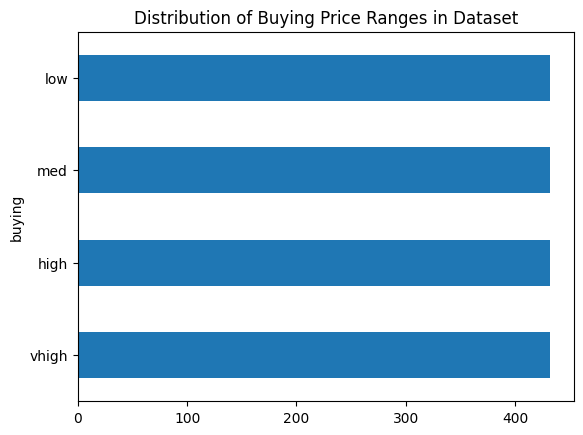

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
----------------------------------
The feature 'buying' is perfectly distributed and there are no missing values
-----------------------------------------------------------------------------


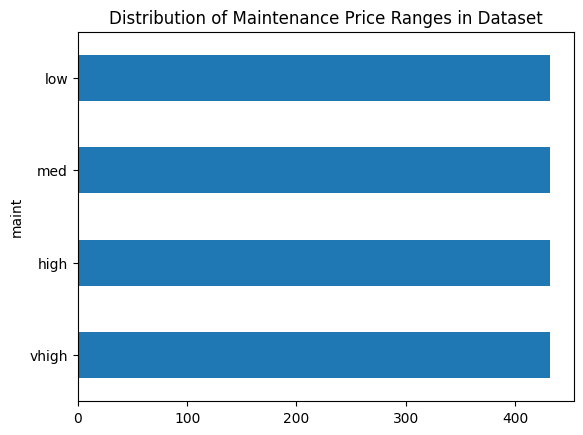

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
----------------------------------
The feature 'maint' is perfectly distributed and there are no missing values
-----------------------------------------------------------------------------


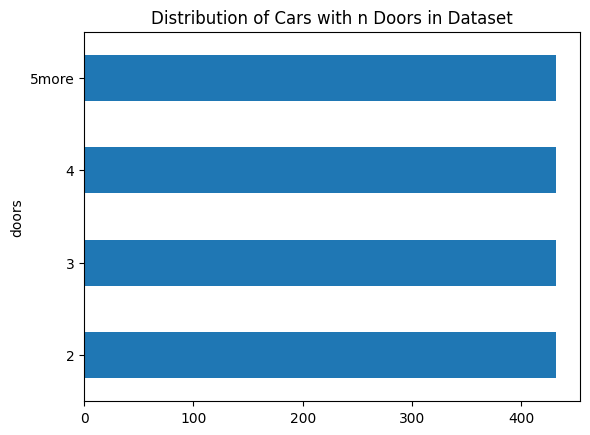

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
----------------------------------
The feature 'doors' is perfectly distributed and there are no missing values
-----------------------------------------------------------------------------


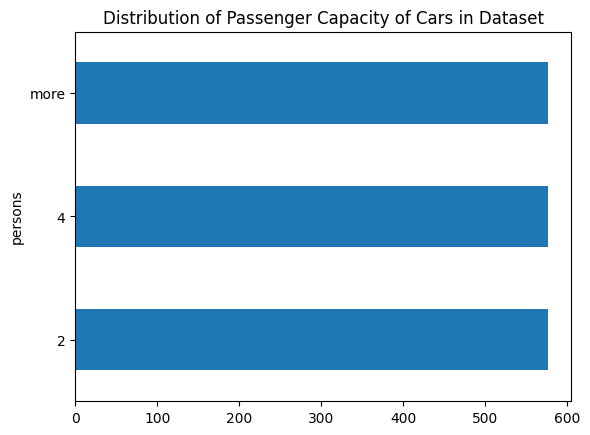

persons
2       576
4       576
more    576
Name: count, dtype: int64
----------------------------------
The feature 'persons' is perfectly distributed and there are no missing values
-----------------------------------------------------------------------------


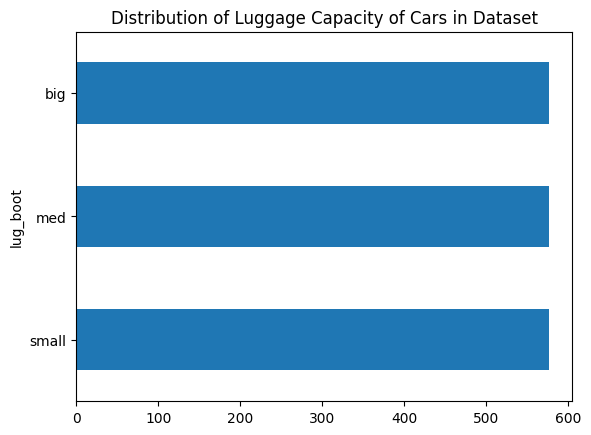

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
----------------------------------
The feature 'lug_boot' is perfectly distributed and there are no missing values
-----------------------------------------------------------------------------


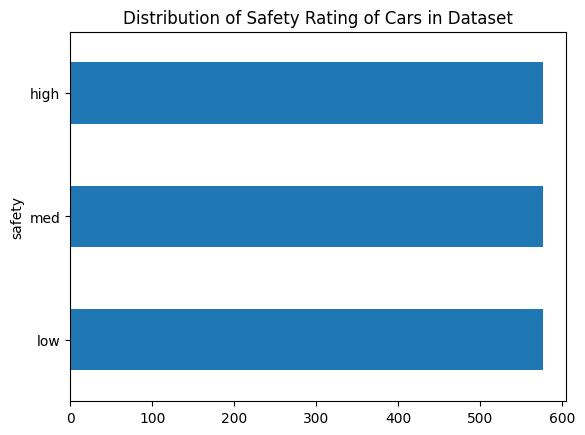

safety
low     576
med     576
high    576
Name: count, dtype: int64
----------------------------------
The feature 'safety' is perfectly distributed and there are no missing values
-----------------------------------------------------------------------------


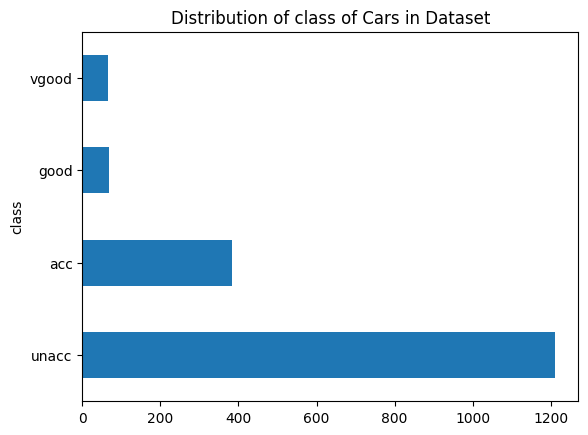

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
----------------------------------
The feature 'class' is not distributed and there are no missing values
-----------------------------------------------------------------------------


In [241]:
plt.figure() # Creates a new figure
df["buying"].value_counts().plot(kind="barh", title="Distribution of Buying Price Ranges in Dataset")
plt.show()

print(df["buying"].value_counts())
print("----------------------------------")
print("The feature 'buying' is perfectly distributed and there are no missing values")
print("-----------------------------------------------------------------------------")

plt.figure()
df["maint"].value_counts().plot(kind="barh", title="Distribution of Maintenance Price Ranges in Dataset")
plt.show()

print(df["maint"].value_counts())
print("----------------------------------")
print("The feature 'maint' is perfectly distributed and there are no missing values")
print("-----------------------------------------------------------------------------")

plt.figure()
df["doors"].value_counts().plot(kind="barh", title="Distribution of Cars with n Doors in Dataset")
plt.show()

print(df["doors"].value_counts())
print("----------------------------------")
print("The feature 'doors' is perfectly distributed and there are no missing values")
print("-----------------------------------------------------------------------------")

plt.figure()
df["persons"].value_counts().plot(kind="barh", title="Distribution of Passenger Capacity of Cars in Dataset")
plt.show()

print(df["persons"].value_counts())
print("----------------------------------")
print("The feature 'persons' is perfectly distributed and there are no missing values")
print("-----------------------------------------------------------------------------")

plt.figure()
df["lug_boot"].value_counts().plot(kind="barh", title="Distribution of Luggage Capacity of Cars in Dataset")
plt.show()

print(df["lug_boot"].value_counts())
print("----------------------------------")
print("The feature 'lug_boot' is perfectly distributed and there are no missing values")
print("-----------------------------------------------------------------------------")

plt.figure()
df["safety"].value_counts().plot(kind="barh", title="Distribution of Safety Rating of Cars in Dataset")
plt.show()

print(df["safety"].value_counts())
print("----------------------------------")
print("The feature 'safety' is perfectly distributed and there are no missing values")
print("-----------------------------------------------------------------------------")


plt.figure()
df["class"].value_counts().plot(kind="barh", title="Distribution of class of Cars in Dataset")
plt.show()
print(df["class"].value_counts())
print("----------------------------------")
print("The feature 'class' is not distributed and there are no missing values")
print("-----------------------------------------------------------------------------")

There are 1728 pieces of data in this dataset. There are 6 features in the data set. There is 1 target class, with 4 different types of classifications being unacc, acc, vgood, and good. Every feature here is categorical where I dont see a clear hierarchal ordering for them. however I dont see any clear ordering. There are no missing values in the dataset thankfully. I can see that all the features have a hierarchy, where its either numerical or quantified by words. However I believe one-hot encoding would be useful as there is no clear relation between all the features.

Ranges:

The range of feature "buying" starts from low all the way until vhigh

The range of feature "maint" starts from low all the way until vhigh

The range of feature "doors" starts from 2 and goes to "5more" which indicates that there can be more than 5 doors

The range of feature "persons" starts from 2 and goes to more

The range of feature "lug_boot" starts from small and goes to big

The range of feature "safety" starts from low and goes to high.


Im going to encode all the features so I can graph them. I will also split the data in half



Due to the data being categorical. Values are not continuous. To do a proper 

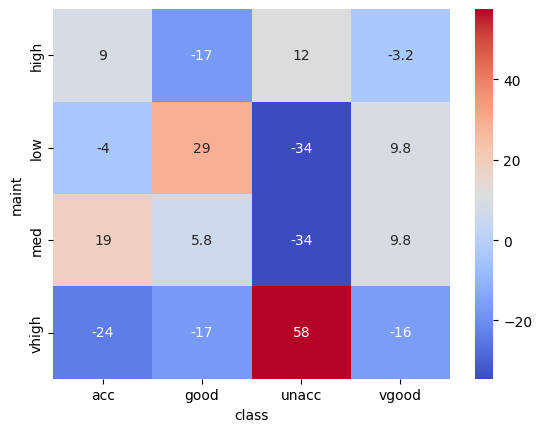

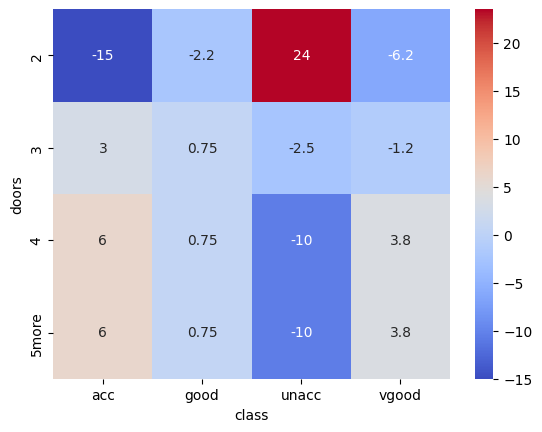

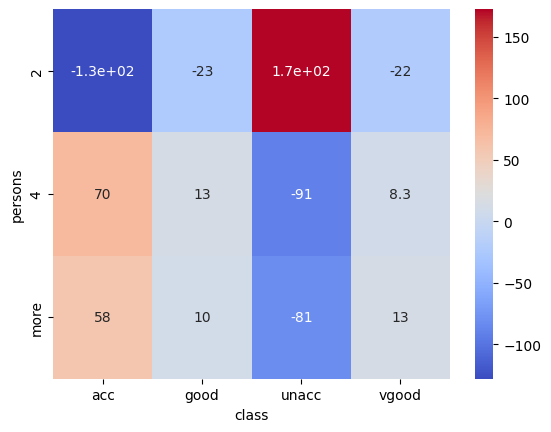

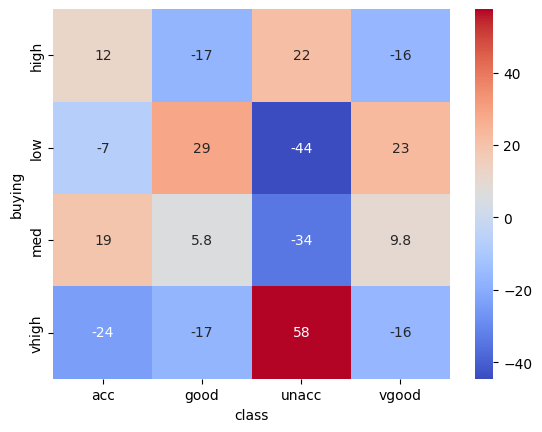

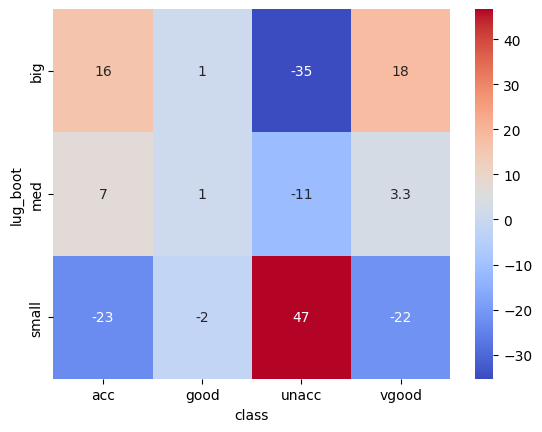

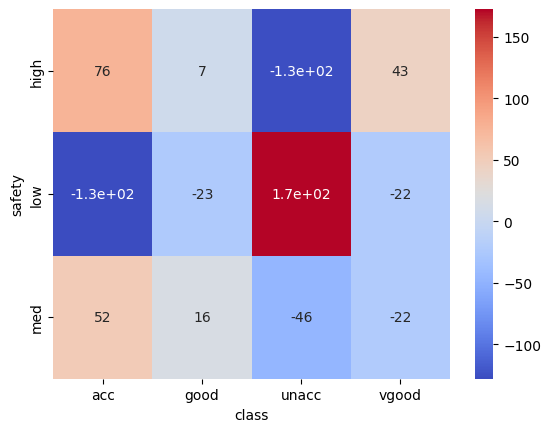

In [242]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns

contingency_table = pd.crosstab(df['maint'], df['class'])

_, _, _, expected = chi2_contingency(contingency_table)
sns.heatmap(contingency_table - expected, annot=True, cmap='coolwarm')
plt.show()

contingency_table = pd.crosstab(df['doors'], df['class'])

_, _, _, expected = chi2_contingency(contingency_table)
sns.heatmap(contingency_table - expected, annot=True, cmap='coolwarm')
plt.show()

contingency_table = pd.crosstab(df['persons'], df['class'])

_, _, _, expected = chi2_contingency(contingency_table)
sns.heatmap(contingency_table - expected, annot=True, cmap='coolwarm')
plt.show()

contingency_table = pd.crosstab(df['buying'], df['class'])

_, _, _, expected = chi2_contingency(contingency_table)
sns.heatmap(contingency_table - expected, annot=True, cmap='coolwarm')
plt.show()

contingency_table = pd.crosstab(df['lug_boot'], df['class'])

_, _, _, expected = chi2_contingency(contingency_table)
sns.heatmap(contingency_table - expected, annot=True, cmap='coolwarm')
plt.show()

contingency_table = pd.crosstab(df['safety'], df['class'])

_, _, _, expected = chi2_contingency(contingency_table)
sns.heatmap(contingency_table - expected, annot=True, cmap='coolwarm')
plt.show()

In [243]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]).toarray()

# Flatten the list of categories for each feature
feature_labels = [category for sublist in ohe.categories_ for category in sublist]

df_encoded = pd.DataFrame(feature_array, columns=feature_labels)
print(df.columns)
print(df_encoded)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
      high  low  med  vhigh  high  low  med  vhigh    2    3  ...  5more    2  \
0      0.0  0.0  0.0    1.0   0.0  0.0  0.0    1.0  1.0  0.0  ...    0.0  1.0   
1      0.0  0.0  0.0    1.0   0.0  0.0  0.0    1.0  1.0  0.0  ...    0.0  1.0   
2      0.0  0.0  0.0    1.0   0.0  0.0  0.0    1.0  1.0  0.0  ...    0.0  1.0   
3      0.0  0.0  0.0    1.0   0.0  0.0  0.0    1.0  1.0  0.0  ...    0.0  1.0   
4      0.0  0.0  0.0    1.0   0.0  0.0  0.0    1.0  1.0  0.0  ...    0.0  1.0   
...    ...  ...  ...    ...   ...  ...  ...    ...  ...  ...  ...    ...  ...   
1723   0.0  1.0  0.0    0.0   0.0  1.0  0.0    0.0  0.0  0.0  ...    1.0  0.0   
1724   0.0  1.0  0.0    0.0   0.0  1.0  0.0    0.0  0.0  0.0  ...    1.0  0.0   
1725   0.0  1.0  0.0    0.0   0.0  1.0  0.0    0.0  0.0  0.0  ...    1.0  0.0   
1726   0.0  1.0  0.0    0.0   0.0  1.0  0.0    0.0  0.0  0.0  ...    1.0  0.0   
1727   0.0  1.0

Attribute normalization for this dataset would not be that efficient. We see that there are some features with numerical values like doors and persons, however these features are almost discrete. We see that doors only has 4 options, although there is a range, the use of attribute normalization would not be benificial as we already have a discrete dataset. Persons is in the same boat where there is 3 options, however one of the options is "more", as in more people can fit that 2 and 4. Since both these features are discrete we can go ahead and encode all the other features as well since they are all discrete, and ignore attribute normalization. I will now initialize all the models

In [244]:
#creating 3 models, Logistic regression, Gaussian Naive Bayes, and Categorial Naive Bayes

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB, CategoricalNB



LR = LogisticRegression()
gnb = GaussianNB()


Testing Logistsic Regression model

In [245]:
y_pred=cross_val_predict(LR, df_encoded, df["class"], cv=4)

print("Classification Report:\n", classification_report(df["class"], y_pred))
accuracy = accuracy_score(df['class'], y_pred)
print('Accuracy:', accuracy)


Classification Report:
               precision    recall  f1-score   support

         acc       0.61      0.48      0.54       384
        good       0.23      0.33      0.27        69
       unacc       0.91      0.92      0.92      1210
       vgood       0.36      0.54      0.43        65

    accuracy                           0.79      1728
   macro avg       0.53      0.57      0.54      1728
weighted avg       0.79      0.79      0.79      1728

Accuracy: 0.7864583333333334


Testing for Gaussian Naive Bayes

In [246]:
y_pred=cross_val_predict(gnb, df_encoded, df["class"], cv=4)

print("Classification Report:\n", classification_report(df["class"], y_pred))
accuracy = accuracy_score(df['class'], y_pred)
print('Accuracy:', accuracy)


Classification Report:
               precision    recall  f1-score   support

         acc       0.58      0.43      0.49       384
        good       0.23      0.87      0.36        69
       unacc       0.93      0.80      0.86      1210
       vgood       0.45      1.00      0.62        65

    accuracy                           0.73      1728
   macro avg       0.55      0.77      0.58      1728
weighted avg       0.81      0.73      0.75      1728

Accuracy: 0.7262731481481481


GNB with priors equal to the distribution of classes.

In [247]:

gnb_prior=GaussianNB(priors=[0.037,0.033,0.23,0.7])

y_pred=cross_val_predict(gnb_prior, df_encoded, df["class"], cv=4)

print("Classification Report:\n", classification_report(df["class"], y_pred))
accuracy = accuracy_score(df['class'], y_pred)
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

         acc       0.58      0.43      0.49       384
        good       0.23      0.87      0.36        69
       unacc       0.93      0.80      0.86      1210
       vgood       0.45      1.00      0.62        65

    accuracy                           0.73      1728
   macro avg       0.55      0.77      0.58      1728
weighted avg       0.81      0.73      0.75      1728

Accuracy: 0.7262731481481481


Changing the priors for gnb doesnt change anything because the model already knows the class distributions, meaning it is not very benificial to changing accuracy


GNB with smoothing of 1

In [248]:
gnb_smoothing=GaussianNB(var_smoothing=1)

y_pred=cross_val_predict(gnb_smoothing, df_encoded, df["class"], cv=4)

print("Classification Report:\n", classification_report(df["class"], y_pred))
accuracy = accuracy_score(df['class'], y_pred)
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

         acc       0.55      0.42      0.48       384
        good       0.41      0.35      0.38        69
       unacc       0.92      0.91      0.91      1210
       vgood       0.28      0.77      0.41        65

    accuracy                           0.77      1728
   macro avg       0.54      0.61      0.55      1728
weighted avg       0.79      0.77      0.78      1728

Accuracy: 0.7731481481481481


Overall accuracy changes as well as different recalls and precisions for some values.

Logistic Regression exp 1:

Using Liblinear as the solver so i can use L1 error as the error minimization. The default error is L2 which is mean squared error. It is the average of the squared differences between the predicted and actual values and more sensitive to outliers as the errors are squared, giving more weight to larger errors. L1 error is the average of the absolute differences between the predicted and actual values.
Less sensitive to outliers compared to L2 error. This data is categorical so predictions can only be between 4 options, where none of the wrong options are more wrong than eachother. Since errors arent too drastic, the accuracy of this change is only 1% off compared to L2 error.

In [249]:
LR_L1 = LogisticRegression(
    solver='liblinear',
   
    penalty='l1'
)

y_pred=cross_val_predict(LR_L1, df_encoded, df["class"], cv=4)

print("Classification Report:\n", classification_report(df["class"], y_pred))
accuracy = accuracy_score(df['class'], y_pred)
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

         acc       0.54      0.44      0.48       384
        good       0.18      0.26      0.21        69
       unacc       0.92      0.94      0.93      1210
       vgood       0.21      0.25      0.23        65

    accuracy                           0.78      1728
   macro avg       0.46      0.47      0.46      1728
weighted avg       0.78      0.78      0.78      1728

Accuracy: 0.7777777777777778


Logistic Regression exp 2:

The primary objective of this experiment was to observe and analyze the impact of balancing class weights on a logistic regression model's performance. The dataset used for this experiment consisted of discrete features with categorical outcomes. To address the issue of class imbalance, the class_weight parameter in the logistic regression model was set to 'balanced'. Additionally, the maximum number of iterations allowed for the solver to converge was set to 1000.

In [250]:
LR_balanced = LogisticRegression(class_weight='balanced',max_iter=100)

y_pred=cross_val_predict(LR_balanced, df_encoded, df["class"], cv=4)

print("Classification Report:\n", classification_report(df["class"], y_pred))
accuracy = accuracy_score(df['class'], y_pred)
print('Accuracy:', accuracy)

Classification Report:
               precision    recall  f1-score   support

         acc       0.54      0.42      0.47       384
        good       0.21      0.72      0.33        69
       unacc       0.96      0.82      0.89      1210
       vgood       0.33      0.83      0.48        65

    accuracy                           0.73      1728
   macro avg       0.51      0.70      0.54      1728
weighted avg       0.82      0.73      0.76      1728

Accuracy: 0.7280092592592593


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Now I will create a table to compare the precisions and recall of each model.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

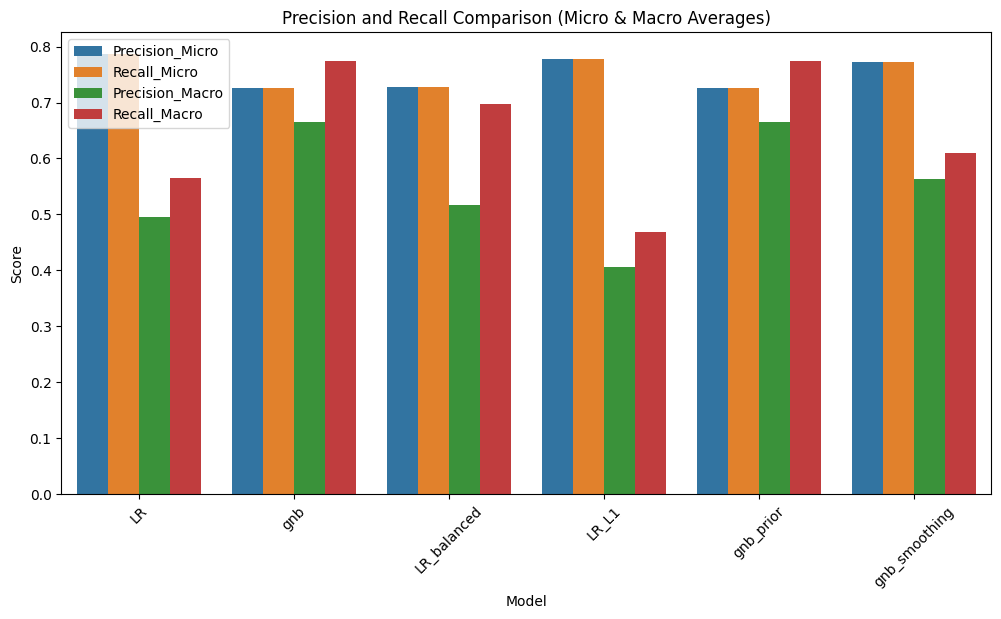

In [255]:
from sklearn.metrics import make_scorer, precision_score, recall_score

# Assuming you have a list of models and their names
models = [LR, gnb, LR_balanced, LR_L1, gnb_prior, gnb_smoothing]
model_names = ["LR", "gnb", "LR_balanced", "LR_L1", "gnb_prior", "gnb_smoothing"]
results = []

# Calculate average precision and recall for each model
for i, model in enumerate(models):
    precision_micro = cross_val_score(model, df_encoded, df["class"], cv=4, scoring=make_scorer(precision_score, average='micro')).mean()
    recall_micro = cross_val_score(model, df_encoded, df["class"], cv=4, scoring=make_scorer(recall_score, average='micro')).mean()
    precision_macro = cross_val_score(model, df_encoded, df["class"], cv=4, scoring=make_scorer(precision_score, average='macro')).mean()
    recall_macro = cross_val_score(model, df_encoded, df["class"], cv=4, scoring=make_scorer(recall_score, average='macro')).mean()
    
    results.append({"Model": model_names[i], 
                    "Precision_Micro": precision_micro, 
                    "Recall_Micro": recall_micro, 
                    "Precision_Macro": precision_macro, 
                    "Recall_Macro": recall_macro})

# Create a DataFrame
results_df = pd.DataFrame(results)

# Melt DataFrame for easy plotting with seaborn
results_melted = pd.melt(results_df, id_vars="Model", var_name="Metric", value_name="Score")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted)
plt.title('Precision and Recall Comparison (Micro & Macro Averages)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


references 

https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/